This dataset describes 5-star rating and free-text tagging activity from [MovieLens](http://movielens.org), a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files 'links.csv', 'movies.csv', 'ratings.csv' and 'tags.csv'. More details about the contents and use of all these files follows:

- User Ids: Unique and anonymized.
- Movies Ids: Only movies with at least one rating. 

In [334]:
# Let's include general porpuses libraries 

import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline

Let's check one by one all the data we have 

In [335]:
dfratings = pd.read_csv('ratings.csv')
dfratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


Ratings are made in a 5-star scale, with half-star increments
Timestamp data is the time when the movie was rated (Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970)

In [336]:
dfratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [337]:
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


Let's translate the timestamp in a datetime type in python

In [338]:
dfratings['timestamp'].values

array([ 964982703,  964981247,  964982224, ..., 1494273047, 1493846352,
       1493846415], dtype=int64)

In [339]:
from datetime import datetime

dates = []

for ts in dfratings['timestamp'].values:
    dates.append((datetime.fromtimestamp((ts))))
    
dfratings['dates'] = dates

In [340]:
dfratings=dfratings.drop('timestamp', axis=1)
dfratings.head()

,userId,movieId,rating,dates
0,1,1,4.0,2000-07-30 20:45:03
1,1,3,4.0,2000-07-30 20:20:47
2,1,6,4.0,2000-07-30 20:37:04
3,1,47,5.0,2000-07-30 21:03:35
4,1,50,5.0,2000-07-30 20:48:51


In [341]:
dftags = pd.read_csv('tags.csv')
dftags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


This table has free-text taggind done by users. Also claissified by userId and movieId. The meaning, value, and purpose of a particular tag is determined by each user.

In [342]:
dftags = dftags.drop('timestamp', axis=1)

In [343]:
dftags.isnull().sum()

userId     0
movieId    0
tag        0
dtype: int64

In [344]:
dftags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   userId   3683 non-null   int64 
 1   movieId  3683 non-null   int64 
 2   tag      3683 non-null   object
dtypes: int64(2), object(1)
memory usage: 86.4+ KB


In [345]:
dfmovies = pd.read_csv('movies.csv')
dfmovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Title includes the title of the movie and the year of release. They are also classified in different Genres:

In [346]:
dfmovies['genres'].value_counts()

Drama                                     1053
Comedy                                     946
Comedy|Drama                               435
Comedy|Romance                             363
Drama|Romance                              349
                                          ... 
Action|Fantasy|Horror|Mystery|Thriller       1
Animation|Children|Drama|Fantasy             1
Crime|Drama|War                              1
Action|Animation|Crime|Drama                 1
Adventure|Horror|Sci-Fi                      1
Name: genres, Length: 951, dtype: int64

They belong to any of the following categories or all the possible combination between them
* Action
* Adventure
* Animation
* Children's
* Comedy
* Crime
* Documentary
* Drama
* Fantasy
* Film-Noir
* Horror
* Musical
* Mystery
* Romance
* Sci-Fi
* Thriller
* War
* Western

In [347]:
dfmovies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [348]:
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


let's separate title and year of release in two different columns:

In [349]:
#find a year stored between parentheses
dff=dfmovies
dfmovies['year'] = dfmovies.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses:
dfmovies['year'] = dfmovies.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column:
dfmovies['title'] = dfmovies.title.str.replace('(\(\d\d\d\d\))', '')
dfmovies

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017
9739,193585,Flint,Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018


We do have some missing values related to the release date of some movies. Those will be manually imputed.

In [350]:
dfmovies['year'].isnull().sum()

13

In [351]:
dfmovies['year'][6059] = 1994
dfmovies['year'][9031] = 2018
dfmovies['year'][9091] = 2015
dfmovies['year'][9138] = 1980
dfmovies['year'][9179] = 2016
dfmovies['year'][9259] = 2016
dfmovies['year'][9367] = 2016
dfmovies['year'][9448] = 2016
dfmovies['year'][9514] = 2015
dfmovies['year'][9515] = 2017
dfmovies['year'][9518] = 2006
dfmovies['year'][9525] = 2017
dfmovies['year'][9611] = 2011

<ipython-input-351-e31fac1c5e3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmovies['year'][6059] = 1994
<ipython-input-351-e31fac1c5e3a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmovies['year'][9031] = 2018
<ipython-input-351-e31fac1c5e3a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfmovies['year'][9091] = 2015
<ipython-input-351-e31fac1c5e3a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [352]:
dfmovies['year'].isnull().sum()

0

In [353]:
dfmovies['year'] = dfmovies['year'].astype(int)

In [354]:
dfmovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
 3   year     9742 non-null   int32 
dtypes: int32(1), int64(1), object(2)
memory usage: 266.5+ KB


We separate the genres in individual columns, if a movie belongs to a speficic genre, the column is encoded with 1, otherwise 0

In [355]:
dfmovies['Action']=dfmovies['genres'].apply(lambda x: 1 if "Action" in x else 0)
dfmovies['Adventure']=dfmovies['genres'].apply(lambda x: 1 if "Adventure" in x else 0)
dfmovies['Animation']=dfmovies['genres'].apply(lambda x: 1 if "Animation" in x else 0)
dfmovies['Children']=dfmovies['genres'].apply(lambda x: 1 if "Children" in x else 0)
dfmovies['Comedy']=dfmovies['genres'].apply(lambda x: 1 if "Comedy" in x else 0)
dfmovies['Crime']=dfmovies['genres'].apply(lambda x: 1 if "Crime" in x else 0)
dfmovies['Documentary']=dfmovies['genres'].apply(lambda x: 1 if "Documentary" in x else 0)
dfmovies['Drama']=dfmovies['genres'].apply(lambda x: 1 if "Drama" in x else 0)
dfmovies['Fantasy']=dfmovies['genres'].apply(lambda x: 1 if "Fantasy" in x else 0)
dfmovies['Film-Noir']=dfmovies['genres'].apply(lambda x: 1 if "Film-Noir" in x else 0)
dfmovies['Horror']=dfmovies['genres'].apply(lambda x: 1 if "Horror" in x else 0)
dfmovies['Musical']=dfmovies['genres'].apply(lambda x: 1 if "Musical" in x else 0)
dfmovies['Mystery']=dfmovies['genres'].apply(lambda x: 1 if "Mystery" in x else 0)
dfmovies['Romance']=dfmovies['genres'].apply(lambda x: 1 if "Romance" in x else 0)
dfmovies['Sci-Fi']=dfmovies['genres'].apply(lambda x: 1 if "Sci-Fi" in x else 0)
dfmovies['Thriller']=dfmovies['genres'].apply(lambda x: 1 if "Thriller" in x else 0)
dfmovies['War']=dfmovies['genres'].apply(lambda x: 1 if "War" in x else 0)
dfmovies['Western']=dfmovies['genres'].apply(lambda x: 1 if "Western" in x else 0)

In [356]:
dfmovies=dfmovies.drop('genres', axis=1)
dfmovies.head()

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [357]:
dflinks = pd.read_csv('links.csv')
dflinks.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


imdbId is the identifier of the movie in imdbId. For possible connection with http://www.imdb.com, https://www.imdb.com/title/tt0 + imdbId

https://www.themoviedb.org/movie/862-toy-story for tmdbId

In [358]:
dflinks.isnull().sum()

movieId    0
imdbId     0
tmdbId     8
dtype: int64

In [359]:
dflinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


Let's get a dictionary with the most commom tags in each movie

In [360]:
dftags['tag']=dftags['tag'].str.lower() ## let's pull all of them in lowercase letters

In [361]:
pd.DataFrame(dftags['tag'].value_counts())

,tag
in netflix queue,131
atmospheric,41
thought-provoking,24
surreal,24
funny,24
...,...
turkey,1
mozart,1
out of order,1
celebrity fetishism,1


Let's just keep tha values with a frequency bigger than 10

In [362]:
mask = pd.DataFrame((dftags['tag'].value_counts())> 10)
to_keep=mask.index[mask['tag'] == True].tolist() ## This are the tags to keep for our model
to_keep

['in netflix queue',
 'atmospheric',
 'thought-provoking',
 'surreal',
 'funny',
 'superhero',
 'disney',
 'sci-fi',
 'religion',
 'quirky',
 'dark comedy',
 'suspense',
 'psychology',
 'visually appealing',
 'twist ending',
 'crime',
 'comedy',
 'politics',
 'music',
 'action',
 'high school',
 'time travel',
 'mental illness',
 'dark',
 'mindfuck',
 'aliens',
 'space',
 'dreamlike',
 'black comedy',
 'holocaust',
 'journalism',
 'shakespeare',
 'mafia',
 'stephen king',
 'disturbing',
 'heist',
 'emotional',
 'satire',
 'anime',
 'christmas',
 'classic',
 'court',
 'ghosts',
 'bittersweet',
 'comic book',
 'animation',
 'adolescence',
 'boxing',
 'psychological',
 'adultery',
 'imdb top 250']

In [363]:
# Lets use a get dummies to obtain a Onehotencoder result, then apply to_keep for only keeping the columns with a
# frequency bigger than 10 
dict_tags=pd.get_dummies(dftags['tag'])
dict_tags=dict_tags[to_keep]

In [364]:
# Lets add this to the original tags dataframe
dftags=dftags.join(dict_tags)

In [365]:
dftags.head()

,userId,movieId,tag,in netflix queue,atmospheric,thought-provoking,surreal,funny,superhero,disney,...,court,ghosts,bittersweet,comic book,animation,adolescence,boxing,psychological,adultery,imdb top 250
0,2,60756,funny,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,60756,highly quotable,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,60756,will ferrell,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,89774,boxing story,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,89774,mma,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [366]:
## Then we could also do a group by movieId, so we have all the tags for a specific movie
tagsbymovie = dftags.drop('userId', axis=1).groupby('movieId').agg(lambda x: sum(x)).reset_index()
tagsbymovie.head()

,movieId,in netflix queue,atmospheric,thought-provoking,surreal,funny,superhero,disney,sci-fi,religion,...,court,ghosts,bittersweet,comic book,animation,adolescence,boxing,psychological,adultery,imdb top 250
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [367]:
dfmovies = dfmovies.merge(tagsbymovie, how='left').fillna(0.0)
dfmovies.head()

,movieId,title,year,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,court,ghosts,bittersweet,comic book,animation,adolescence,boxing,psychological,adultery,imdb top 250
0,1,Toy Story,1995,0,1,1,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,1995,0,1,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,1995,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,1995,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,1995,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Lets merge the ranking dt with our final movies/tags df:

In [368]:
df = dfratings.set_index('movieId').join(dfmovies.set_index('movieId')).reset_index()

In [369]:
df.head()

,movieId,userId,rating,dates,title,year,Action,Adventure,Animation,Children,...,court,ghosts,bittersweet,comic book,animation,adolescence,boxing,psychological,adultery,imdb top 250
0,1,1,4.0,2000-07-30 20:45:03,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5,4.0,1996-11-08 07:36:02,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,7,4.5,2005-01-25 07:52:26,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,15,2.5,2017-11-13 13:59:30,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,17,4.5,2011-05-18 07:28:03,Toy Story,1995,0,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Non personalized recommendations 
- Optionel (Movies seen together) 
- Top 10 Movies (Semaine, mois, )
- Top 10 Movies per category (Semaine, mois, )
- Top 10 most popular (Semaine, mois, )
- Top 10 categories (Semaine, mois, )
- Top 10 tags (Semaine, mois, )

First, let's define a function that will consider only the data in a specific
period:

In [370]:
def dateperiod(df, days_past, end_date=datetime(2018, 9, 24)):    
    mask = ((df['dates'] > (end_date - timedelta(days=days_past))) & (df['dates'] <= end_date ))
    return df.loc[mask]

In [371]:
dateperiod(df, days_past=1)

,movieId,userId,rating,dates,title,year,Action,Adventure,Animation,Children,...,court,ghosts,bittersweet,comic book,animation,adolescence,boxing,psychological,adultery,imdb top 250
100779,187031,514,2.5,2018-09-23 05:55:27,Jurassic World: Fallen Kingdom,2018,1,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100800,187595,514,3.0,2018-09-23 05:55:46,Solo: A Star Wars Story,2018,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [372]:
def top_popular(df, top, days_past, categories_filter=0):
    df_timestamp = dateperiod(df, days_past=days_past)
    df_filtred = df_timestamp
    if categories_filter!=0:
        for i in categories_filter:
            df_filtred = df_filtred[df_filtred[i]==1]
    
    dfTop10Popular = df_filtred.groupby(['movieId','title'])['rating'].agg('count').reset_index(name='nb_ratings').sort_values(by='nb_ratings', ascending=False).head(top)

    
    return dfTop10Popular

In [373]:
categories_filter=['Horror']
top_popular(df, 5, 100, categories_filter=categories_filter)

,movieId,title,nb_ratings
3,593,"Silence of the Lambs, The",7
52,2762,"Sixth Sense, The",6
125,168250,Get Out,4
10,1258,"Shining, The",4
7,1214,Alien,3


In [374]:
def top_rating(df, top, days_past, categories_filter=0):
    df_timestamp = dateperiod(df, days_past=days_past)
    df_filtred = df_timestamp
    if categories_filter!=0:
        for i in categories_filter:
            df_filtred = df_filtred[df_filtred[i]==1]
            
    df_rating_mean = df_filtred.groupby(['movieId','title'])['rating'].agg('mean').reset_index(name='rating_mean')
    df_rating_count = df_filtred.groupby(['movieId',])['rating'].agg('count').reset_index(name='rating_count')
    dfTop10movies = df_rating_mean.merge(df_rating_count, on='movieId', how='left')
    filter_factor = round(max(dfTop10movies['rating_count'])/3)
    dfTop10movies = dfTop10movies[dfTop10movies['rating_count']>filter_factor].sort_values(by = 'rating_mean',ascending = False).head(top)

    return dfTop10movies

In [375]:
categories_filter = ["Comedy"]
top_rating(df=df, top=10, days_past=365)

,movieId,title,rating_mean,rating_count
96,318,"Shawshank Redemption, The",4.523810,21
3249,168252,Logan,4.500000,9
881,3578,Gladiator,4.461538,13
350,1258,"Shining, The",4.444444,9
82,260,Star Wars: Episode IV - A New Hope,4.406250,16
469,1704,Good Will Hunting,4.366667,15
1988,60069,WALL·E,4.343750,16
1831,48516,"Departed, The",4.277778,9
1836,48780,"Prestige, The",4.269231,13
2078,68157,Inglourious Basterds,4.250000,16


Next, we take these outputs and we do barplots to show the rankings:

In [376]:
import seaborn as sns
def displaytop(df, x, y):
    ax =sns.barplot(x=x, y=y, data=df)    

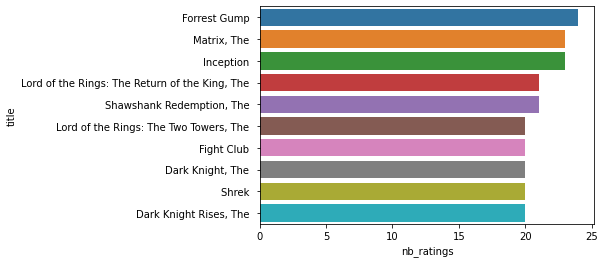

In [377]:
displaytop(top_popular(df=df, top=10, days_past=365), 'nb_ratings', 'title')

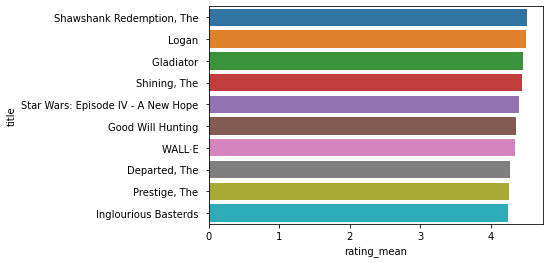

In [378]:
displaytop(top_rating(df=df, top=10, days_past=365), 'rating_mean', 'title')

Let's also check the top genres in a specific time frame:

In [413]:
def top_genre(df, top, days_past):
    df_timestamp = dateperiod(df, days_past=days_past) 
    categories = df_timestamp.columns[6:24]
    sum_categories = dict()
    for i in categories:
        sum_categories[i] = df_timestamp[i].sum()
    
    sorted_categories = sorted(sum_categories.items(), key=lambda x: x[1], reverse=True)
    sorted_categoriesdf = pd.DataFrame(sorted_categories).head(top)
    sorted_categoriesdf.columns = ['Genre', 'Genre_count']
    return sorted_categoriesdf

In [415]:
top_genre(df, 5, 300)

,Genre,Genre_count
0,Comedy,2834
1,Drama,2382
2,Action,2228
3,Adventure,2032
4,Sci-Fi,1406


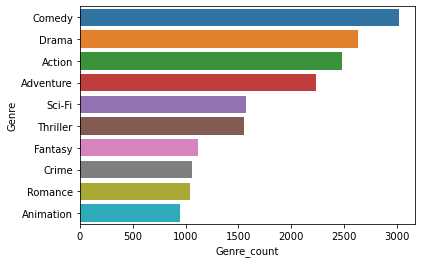

In [416]:
displaytop(top_genre(df, 10, 365), 'Genre_count', 'Genre')

In [403]:
from wordcloud import WordCloud

#récupération du dataframe des tags de film et leur fréquence
dftagsCount = pd.DataFrame(dftags['tag'].value_counts())
dftagsCount

,tag
in netflix queue,131
atmospheric,41
thought-provoking,24
surreal,24
funny,24
...,...
turkey,1
mozart,1
out of order,1
celebrity fetishism,1


In [460]:
def top_tags(df, top, days_past):
    df_timestamp = dateperiod(df, days_past=days_past) 
    tags = df_timestamp.columns[24:]
    sum_tags = dict()
    for i in tags:
        sum_tags[i] = df_timestamp[i].sum()
    
    sorted_tags= sorted(sum_tags.items(), key=lambda x: x[1], reverse=True)
    sorted_tagsdf = pd.DataFrame(sorted_tags).head(top)
    sorted_tagsdf.columns = ['Tag', 'Tag_count']
    return sorted_tagsdf

In [461]:
aux=top_tags(df, 10, 10)
aux

,Tag,Tag_count
0,thought-provoking,15.0
1,superhero,15.0
2,visually appealing,15.0
3,atmospheric,12.0
4,action,11.0
5,psychology,10.0
6,quirky,9.0
7,funny,8.0
8,sci-fi,8.0
9,dark comedy,8.0


In [466]:
def plot_wordcloud(df):
    df = df.set_index('Tag')
    wc = WordCloud().generate_from_frequencies(df['Tag_count'])

    # Partie plot
    plt.figure()
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

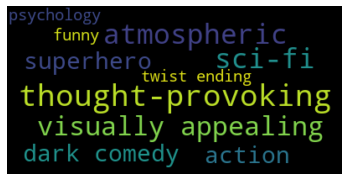

In [469]:
plot_wordcloud(top_tags(df, 10, 365))

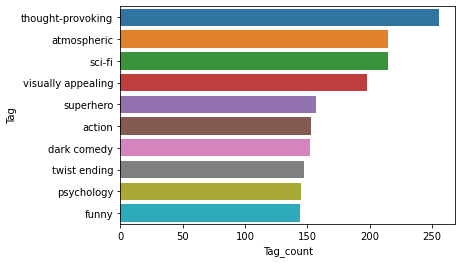

In [470]:
displaytop(top_tags(df, 10, 365), 'Tag_count', 'Tag')